In [2]:
# Definition of activation function:
 
# Activation function decides, whether a neuron should be activated or not by calculating weighted sum and further adding bias with it. 
# The purpose of the activation function is to introduce non-linearity into the output of a neuron. 

# Explanation :

# We know, neural network has neurons that work in correspondence of weight, bias and their respective activation function. 
# In a neural network, we would update the weights and biases of the neurons on the basis of the error at the output. 
# This process is known as back-propagation. Activation functions make the back-propagation possible since the gradients are supplied along with the error to update the weights and biases. 

# Why do we need Non-linear activation functions :

# A neural network without an activation function is essentially just a linear regression model. 
# The activation function does the non-linear transformation to the input making it capable to learn and perform more complex tasks. 

In [8]:
# Bring in the useful Libraries

import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
from matplotlib.pyplot import axis
import numpy as np
torch.manual_seed(2)

# set up CUDA GPU

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 

In [7]:
#  create a tensor in order to apply the graph for the functions

z = torch.arange(-10, 10, 0.1).view(-1, 1)

In [9]:
# define the functions

yhat_sig  = torch.sigmoid(z)

yhat_relu  = torch.relu(z)

yhat_tanh = torch.tanh(z)

In [10]:
# ACTIVATION FUNCTIONS : ( see the following graph )

# 1. Relu (the solution for the vanishing gradient)       The function returns 0 if it receives any negative input, 
#                                                         but for any positive value x, it returns that value back. 
#                                                         Thus it gives an output that has a range from 0 to infinity.

# 2. Sigmoid (upperbound = 1, lowerbound = 0) , drawbacκ --> vanishing gradient

# 3. Tanh (upperbound = 1, lowerbound = -1)


# The problem with the tanh and sigmoid activation function:
# The derivative is near zero in many regions

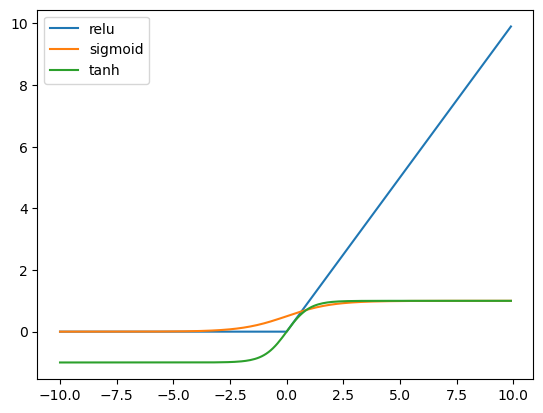

In [11]:
# Plot the results to compare the activation functions

plt.plot(z.numpy(), yhat_relu.numpy(), label='relu')       # gives full 0 as long as z is negative but then gives the same positive output as z input
plt.plot(z.numpy(), yhat_sig.numpy(), label='sigmoid')     # from 0 to 1
plt.plot(z.numpy(), yhat_tanh.numpy(), label='tanh')       # from -1 to 1

plt.legend() # shows the labels up and left of the diagram

In [13]:
# Load some data

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

print(f"Length of train_dataset is {len(train_dataset)} rows", f"\nLength of validation_dataset is {len(validation_dataset)} rows")

Length of train_dataset is 60000 rows 
Length of validation_dataset is 10000 rows


In [14]:
# create 3 models applying 3 different activation functions with 3 predictions

# 1. Net with sigmoid activation
class Net(nn.Module):
    
    # contructor
    def __init__(self, D_IN, H1, H2, D_OUT) -> None:
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_IN, H1) # 1ST HIDDEN LAYER
        self.linear2 = nn.Linear(H1, H2) # 2ND HIDDEN LAYER
        self.linear3 = nn.Linear(H2, D_OUT)
    
    # prediction    
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))       
        x = torch.sigmoid(self.linear2(x))
        x = self.linear3(x)        
        return x        

In [15]:
# 2. Net with Relu activation
class NetRelu(nn.Module):
    
    # contructor
    def __init__(self, D_IN, H1, H2, D_OUT) -> None:
        super(NetRelu, self).__init__()
        self.linear1 = nn.Linear(D_IN, H1) # 1ST HIDDEN LAYER
        self.linear2 = nn.Linear(H1, H2) # 2ND HIDDEN LAYER
        self.linear3 = nn.Linear(H2, D_OUT)
    
    # prediction    
    def forward(self, x):
        x = torch.relu(self.linear1(x))       
        x = torch.relu(self.linear2(x))
        x = self.linear3(x)
        return x

In [16]:
# 3. Net with Tanh activation

class NetTanh(nn.Module):
    
    # contructor
    def __init__(self, D_IN, H1, H2, D_OUT) -> None:
        super(NetTanh, self).__init__()
        self.linear1 = nn.Linear(D_IN, H1) # 1ST HIDDEN LAYER
        self.linear2 = nn.Linear(H1, H2) # 2ND HIDDEN LAYER
        self.linear3 = nn.Linear(H2, D_OUT)
    
    # prediction    
    def forward(self, x):
        x = torch.tanh(self.linear1(x))       
        x = torch.tanh(self.linear2(x))
        x = self.linear3(x)
        return x    

In [19]:
# create 3 different models

input_dim = 28 * 28
hidden_dim_1 = 50
hidden_dim_2 = 50
output_dim = 10

model_Sig = Net(input_dim, hidden_dim_1, hidden_dim_2, output_dim)
model_Sig.to(device)
print(model_Sig)

model_Tanh = NetTanh(input_dim, hidden_dim_1, hidden_dim_2, output_dim)
model_Tanh.to(device)
print(model_Tanh)

model_Relu = NetRelu(input_dim, hidden_dim_1, hidden_dim_2, output_dim)
model_Relu.to(device)

Net(
  (linear1): Linear(in_features=784, out_features=50, bias=True)
  (linear2): Linear(in_features=50, out_features=50, bias=True)
  (linear3): Linear(in_features=50, out_features=10, bias=True)
)
NetTanh(
  (linear1): Linear(in_features=784, out_features=50, bias=True)
  (linear2): Linear(in_features=50, out_features=50, bias=True)
  (linear3): Linear(in_features=50, out_features=10, bias=True)
)


NetRelu(
  (linear1): Linear(in_features=784, out_features=50, bias=True)
  (linear2): Linear(in_features=50, out_features=50, bias=True)
  (linear3): Linear(in_features=50, out_features=10, bias=True)
)

In [20]:
# Create Loss Criterion function, DataLoader & 1 optimizer for each model

criterion = nn.CrossEntropyLoss()

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

# 1.model_sig
optimizer_sig = torch.optim.SGD(model_Sig.parameters(), lr=0.01)

# 2.model_tanh
optimizer_tanh = torch.optim.SGD(model_Tanh.parameters(), lr=0.01)

# 3.model_relu
optimizer_relu = torch.optim.SGD(model_Relu.parameters(), lr=0.01)

In [21]:
# Create a method to train the models

def train(model, criterion, train_loader, validation_loader, optimizer, epochs):
    
    i = 0
    useful_stuff = {'training_loss':[], 'validation_accuracy':[]}  

    for epoch in range(epochs):
        for i, (features, labels) in enumerate(train_loader):
            
            features, labels = features.to(device), labels.to(device)
            
            optimizer.zero_grad()
            
            predictions = model(features.view(-1, 28 * 28))
            
            loss = criterion(predictions, labels)
            loss.backward()
            
            optimizer.step()
            
            useful_stuff['training_loss'].append(loss.item())

        correct = 0
        for features, labels in validation_loader:
            
            features, labels = features.to(device), labels.to(device)
            
            predictions = model(features.view(-1, 28 * 28))
            
            _, label=torch.max(predictions, 1)                # label will get the largest element of predictions, and labels (of validation data) will be our actual classes 
            correct += (label == labels).sum().item()         # it compares each element of label with the corresponding element of “labels validation data"
                                                              # then sumps up the 1s (ones) meaning where the label and labels are of the the same class
            
            
        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)

    return useful_stuff

In [22]:
# 1. train sig model for 10 epochs

train_sig = train(model_Sig, criterion, train_loader, validation_loader, optimizer_sig, 10)

In [23]:
# 2. train tanh model for 10 epochs

train_tanh = train(model_Tanh, criterion, train_loader, validation_loader, optimizer_tanh, 10)

In [24]:
# 3. train relu model for 10 epochs

train_relu = train(model_Relu, criterion, train_loader, validation_loader, optimizer_relu, 10)

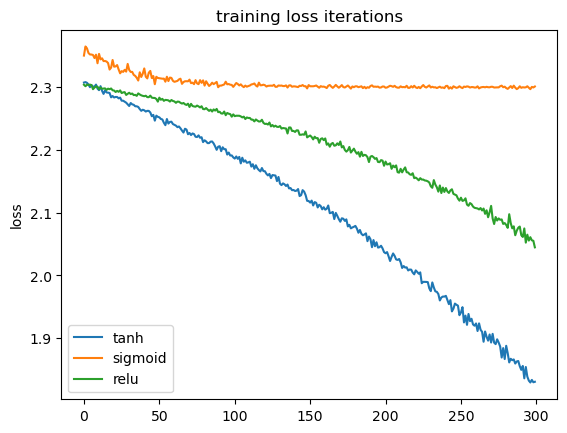

In [25]:
# Compare the training loss

plt.plot(train_tanh['training_loss'], label='tanh')
plt.plot(train_sig['training_loss'], label='sigmoid')
plt.plot(train_relu['training_loss'], label='relu')
plt.ylabel('loss')
plt.title('training loss iterations')
plt.legend()
plt.show()

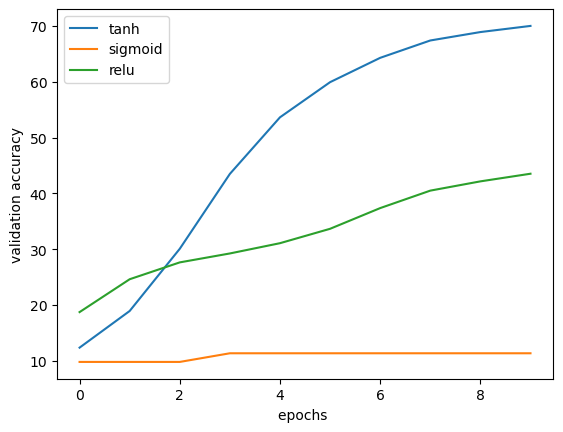

In [26]:
# Compare the validation accuracy

plt.plot(train_tanh['validation_accuracy'], label='tanh')
plt.plot(train_sig['validation_accuracy'], label='sigmoid')
plt.plot(train_relu['validation_accuracy'], label='relu') 
plt.ylabel('validation accuracy')
plt.xlabel('epochs ')
plt.legend()
plt.show()